In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = Sequential([

    Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128,activation='relu'),
    Dropout(0.5),

    Dense(1 , activation='sigmoid')

    ])

C:\Users\amin\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.2 , zoom_range=0.2 , horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_dir = './train/'

In [8]:
test_dir = './test/'

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode='binary')

Found 560 images belonging to 2 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode='binary')

Found 143 images belonging to 2 classes.


In [21]:
model.fit(train_generator,epochs=10,validation_data=test_generator)

C:\Users\amin\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5051 - loss: 0.7423

C:\Users\amin\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 682ms/step - accuracy: 0.5053 - loss: 0.7412 - val_accuracy: 0.6364 - val_loss: 0.6902
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.5592 - loss: 0.6856 - val_accuracy: 0.6014 - val_loss: 0.6802
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 402ms/step - accuracy: 0.5492 - loss: 0.6776 - val_accuracy: 0.4965 - val_loss: 0.7317
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.5957 - loss: 0.6689 - val_accuracy: 0.5315 - val_loss: 0.7133
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step - accuracy: 0.6145 - loss: 0.6675 - val_accuracy: 0.6503 - val_loss: 0.6677
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - accuracy: 0.6635 - loss: 0.6380 - val_accuracy: 0.6294 - val_loss: 0.6738
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 478ms/step - accuracy: 0.6217 - loss: 0.6234 - val_accuracy: 0.6923 - val_loss: 0.6736
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 525ms/step - accuracy: 0.6262 - loss: 0.6204 - val_accuracy: 0.6713 - val

In [23]:
test_loss , test_accuracy = model.evaluate(test_generator,verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.6701 - loss: 0.7205


In [25]:
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 65.73%
Test Loss: 0.6981


In [27]:
from tensorflow.keras.utils import plot_model

In [29]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [31]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [33]:
import matplotlib.pyplot as plt

In [35]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - accuracy: 0.7289 - loss: 0.5430 - val_accuracy: 0.6434 - val_loss: 0.7792
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.7026 - loss: 0.5543 - val_accuracy: 0.6364 - val_loss: 0.6735
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 385ms/step - accuracy: 0.7627 - loss: 0.5154 - val_accuracy: 0.6853 - val_loss: 0.6678
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.7503 - loss: 0.4951 - val_accuracy: 0.6434 - val_loss: 0.6595
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step - accuracy: 0.7752 - loss: 0.5109 - val_accuracy: 0.6294 - val_loss: 0.6501
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 401ms/step - accuracy: 0.7805 - loss: 0.4595 - val_accuracy: 0.6713 - val_loss: 0.6949
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 416ms/step - accuracy: 0.7827 - loss: 0.4631 - val_accuracy: 0.6573 - val_loss: 0.6617
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 391ms/step - accuracy: 0.7723 - loss: 0.4754 - val_accuracy: 0.

In [37]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

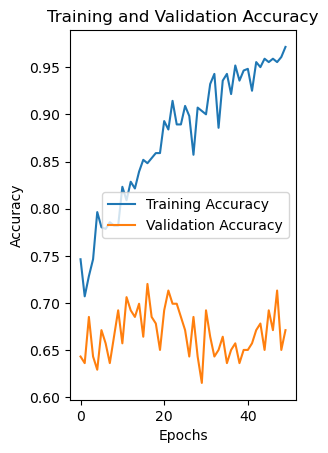

In [39]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


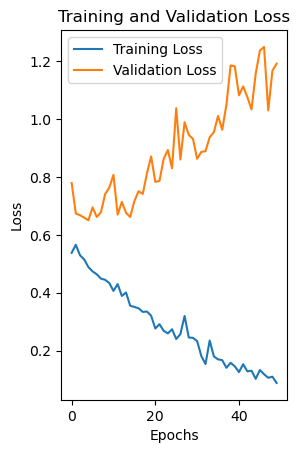

In [41]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [43]:

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
It's a Cat!


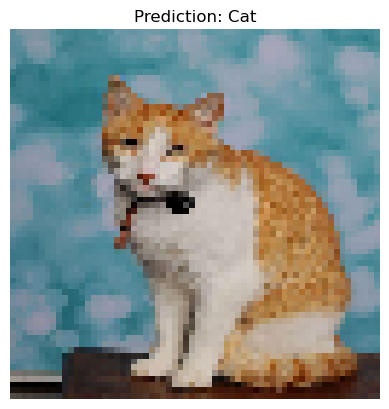

In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an example image
img_path = './test/cats/cat_1.jpg'  # Replace with a test image
img = image.load_img(img_path, target_size=(64, 64))  # Resize to model input size

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize pixel values

# Predict
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")

# Display the image
plt.imshow(img)
plt.title("Prediction: Dog" if prediction[0][0] > 0.5 else "Prediction: Cat")
plt.axis('off')
plt.show()


In [47]:
test_loss , test_accuracy = model.evaluate(test_generator,verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6417 - loss: 1.3870
